In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,f1_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [4]:
df = pd.read_csv('water_potability.csv')

df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
df.shape


(7999, 21)

In [6]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


# able 3: Parameters with range values:
Parameter Range
Ammonia dangerous-if-greater-than-32.5
Arsenic dangerous-if-greater-than-0.01
Barium dangerous-if-greater-than-2
cadmium dangerous-if-greater-than-0.005
Chloramine dangerous-if-greater-than-4
Chromium dangerous-if-greater-than-0.1
Copper dangerous-if-greater-than-1.3
fluoride dangerous-if-greater-than-1.5
Bacteria dangerous-if-greater-than-0
Viruses dangerous-if-greater-than-0
Lead dangerous-if-greater-than-0.015
Nitrates dangerous-if-greater-than-10
Nitrites dangerous-if-greater-than-1
Mercury dangerous-if-greater-than-0.002
Perchlorate dangerous-if-greater-than-56
Radium dangerous-if-greater-than-5
Selenium dangerous-if-greater-than-0.5
Silver dangerous-if-greater-than-0.1
Uranium dangerous-if-greater-than-0.3
is safe class-attribute-{0---not-safe,-1---safe}

In [7]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

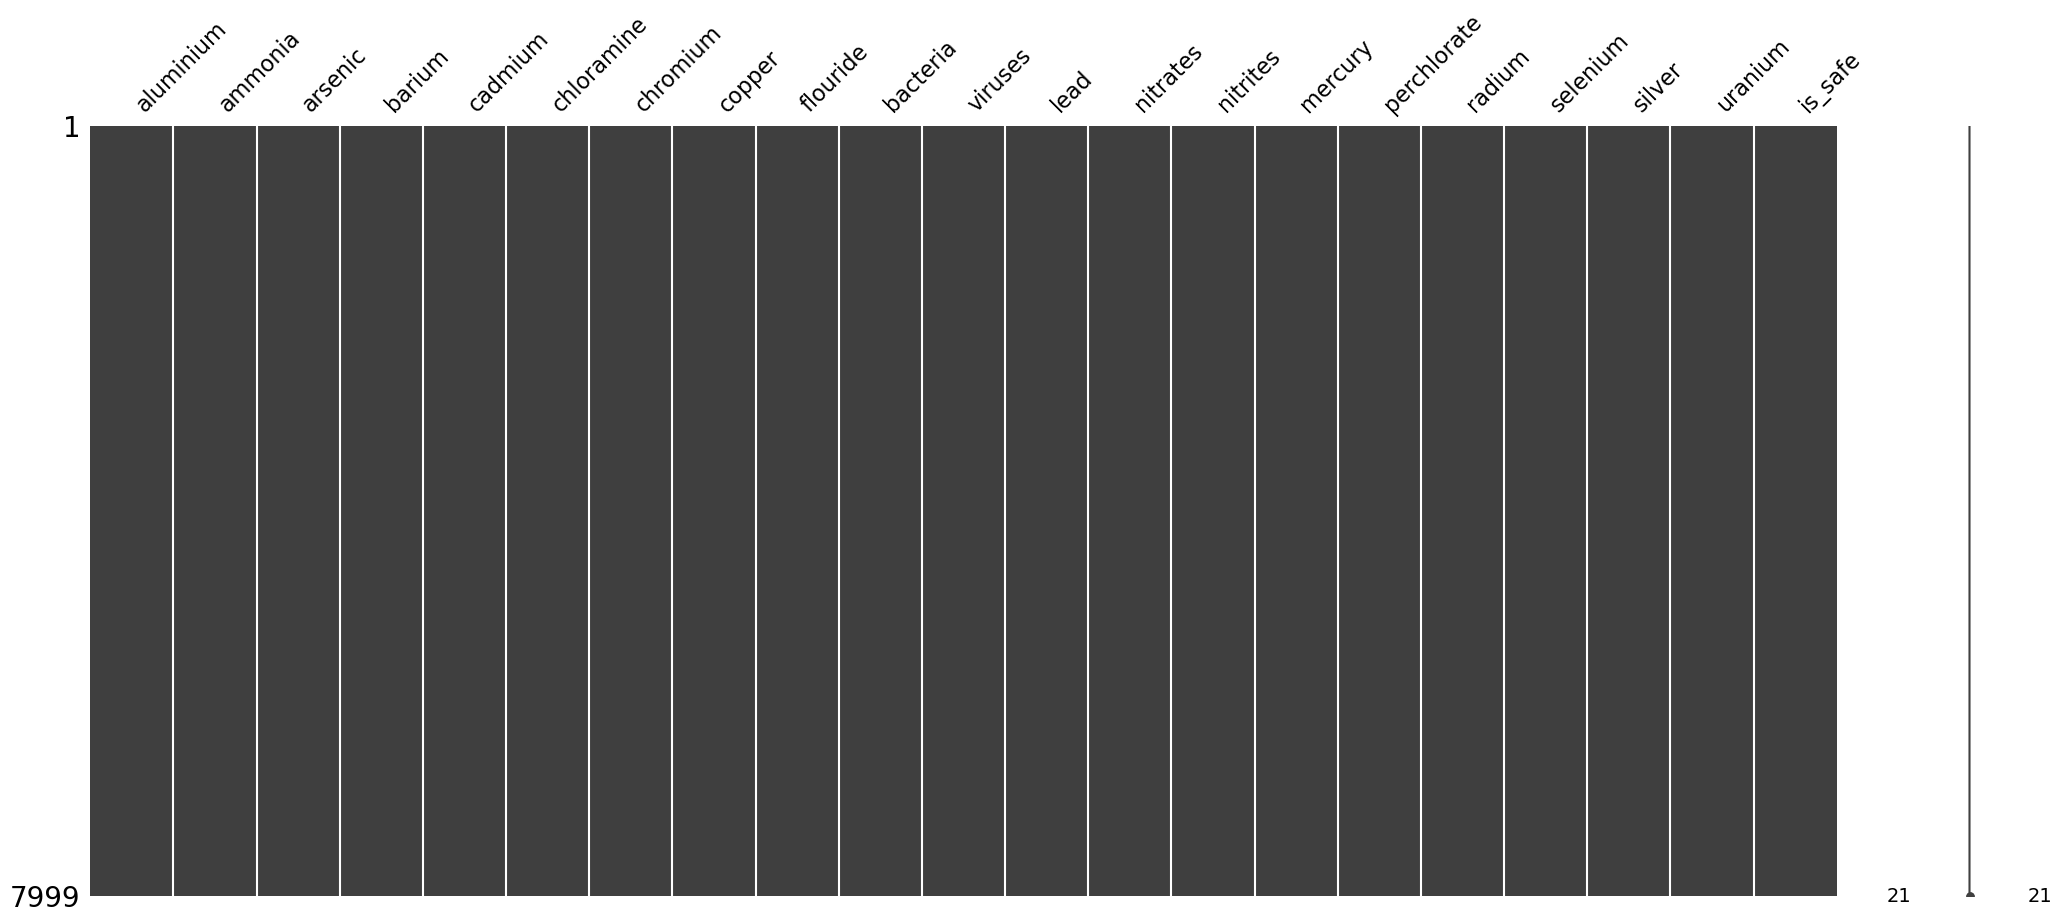

In [8]:
import missingno as msno
fig = msno.matrix(df)

# analysing the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

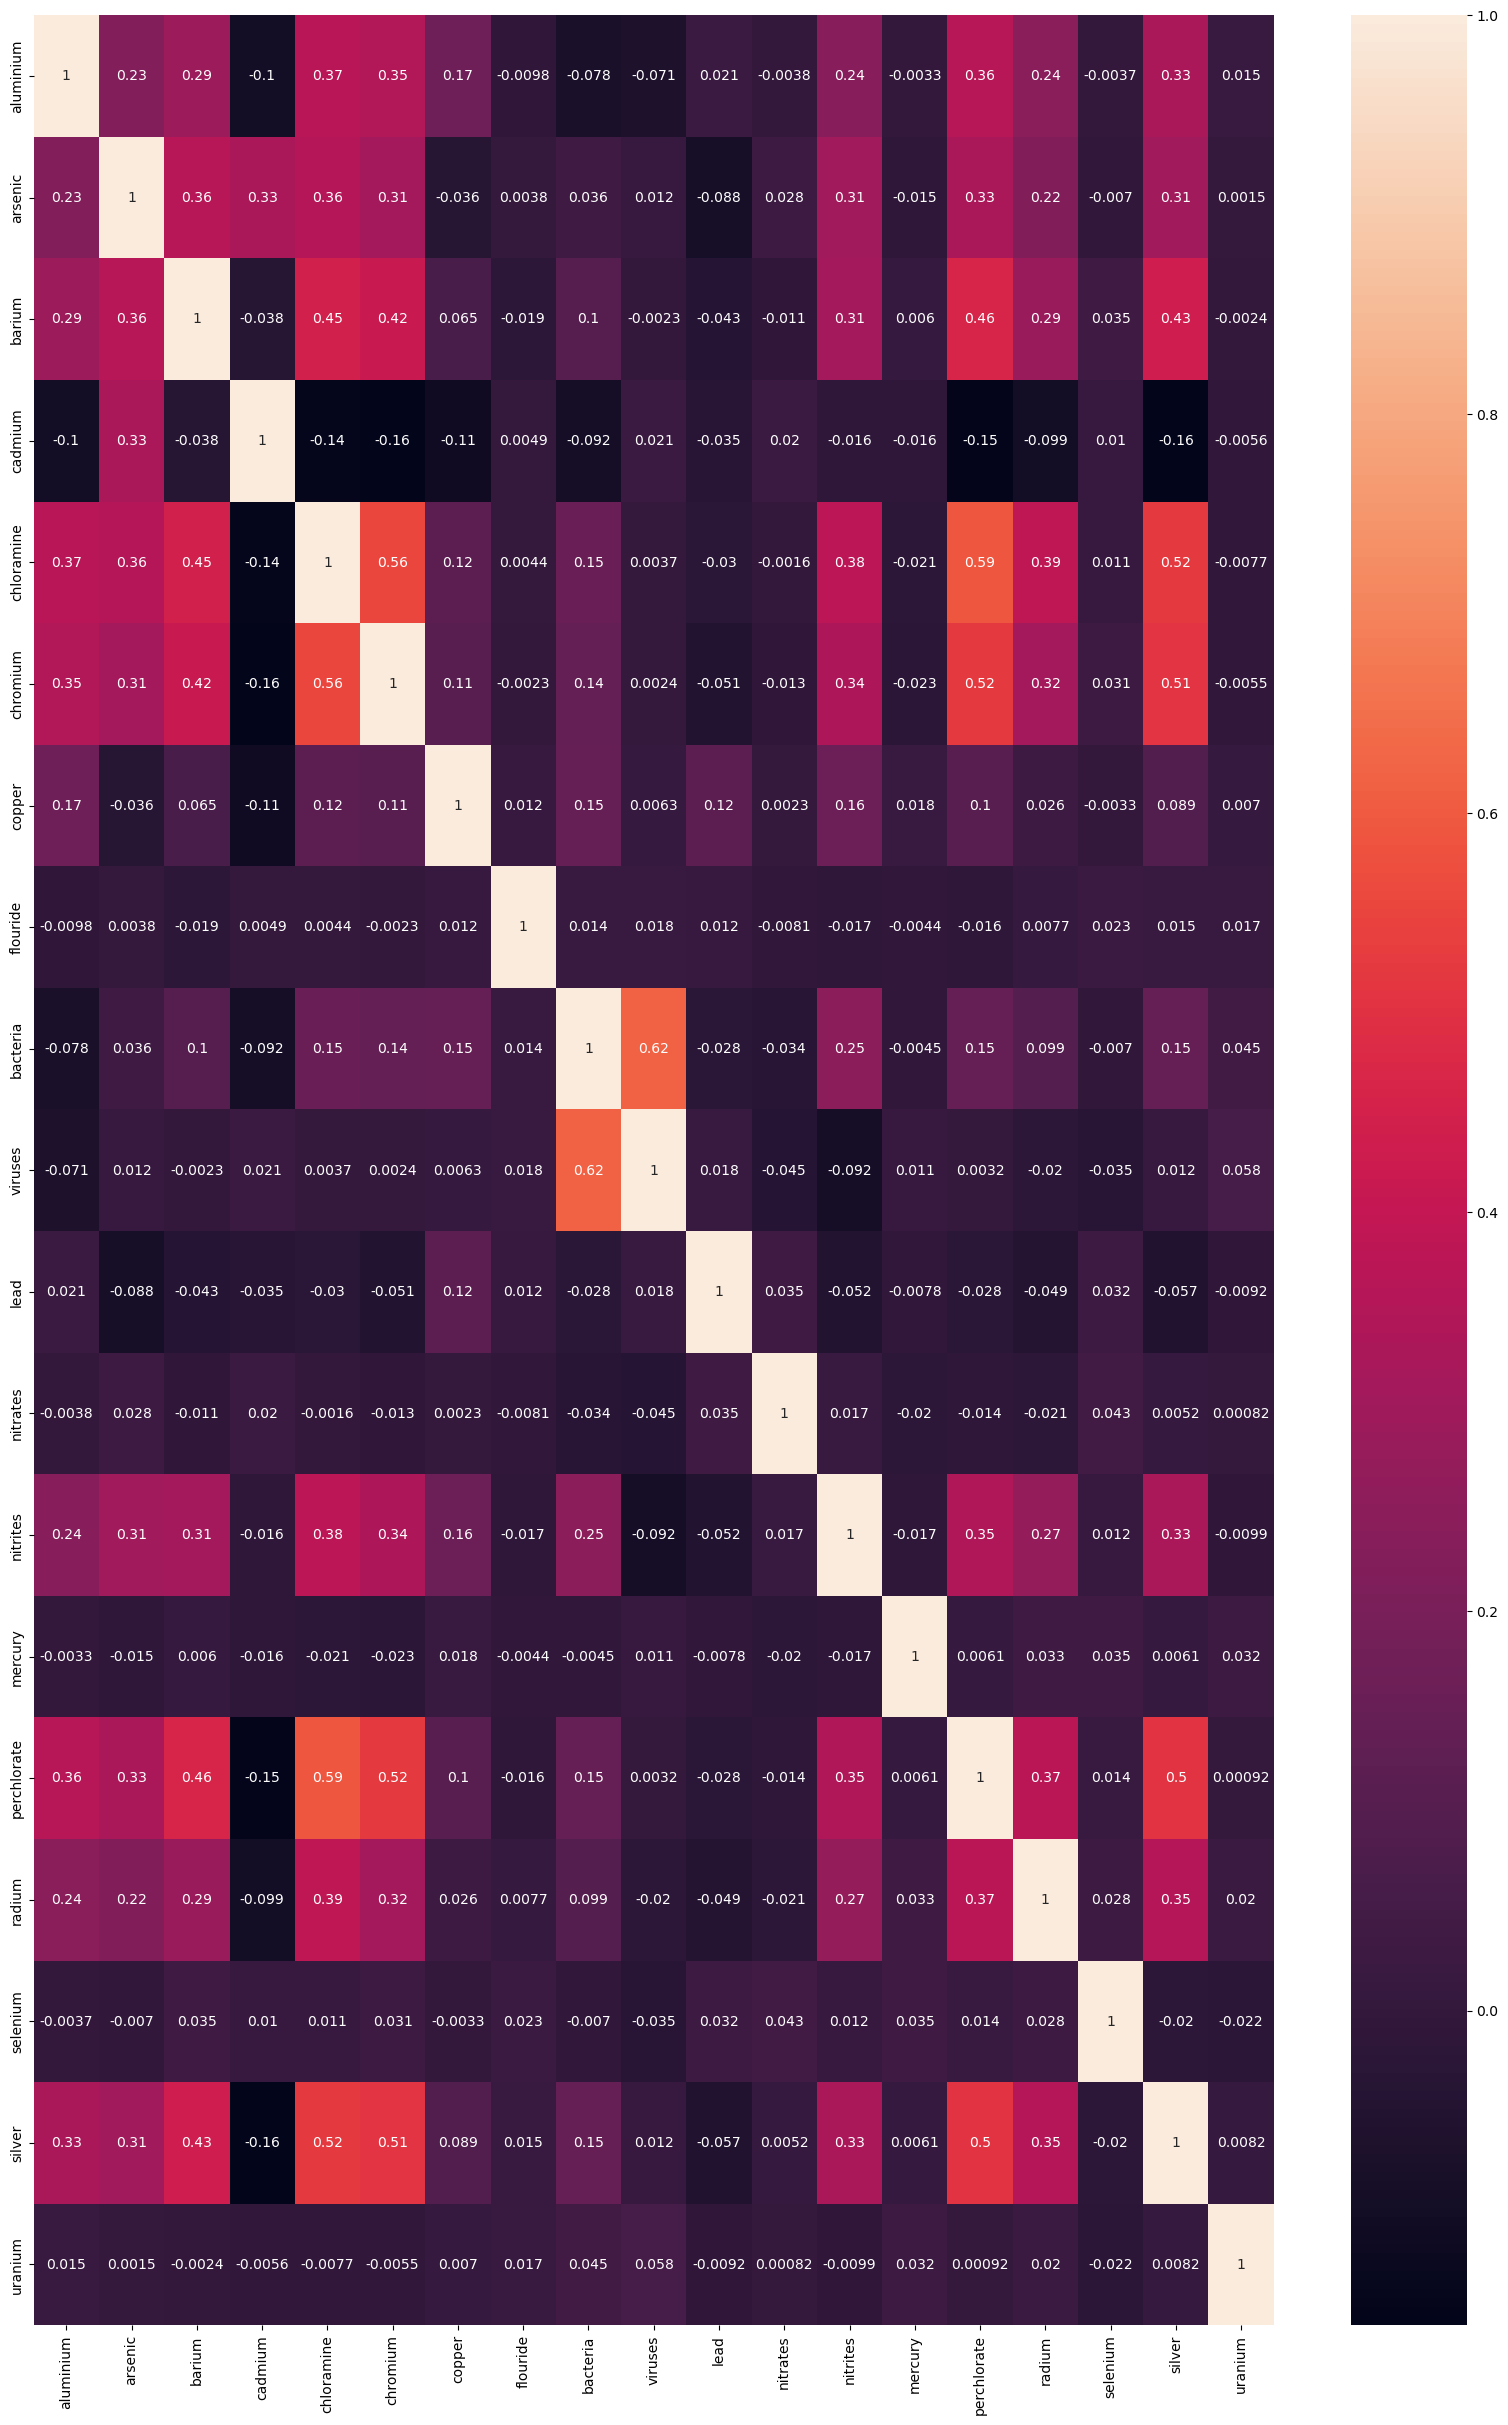

In [10]:
# Set figure size
plt.figure(figsize=(20, 30))

# Create heatmap
sns.heatmap(df.corr(), annot=True)

# Show plot
plt.show()

# handling missing data

In [11]:
num_cells = df[df == '#NUM!'].count().sum()

# Print the result
print(f"The CSV file has {num_cells} cells with '#NUM!' values.")

The CSV file has 6 cells with '#NUM!' values.


Missing data is a common issue in data analysis and can occur due to a variety of reasons such as data collection errors, incomplete records, or data processing issues. In some cases, it may be appropriate to fill missing data with a value, such as the mean or median of the non-missing data in the same column. However, in other cases, it may be more appropriate to simply remove the missing data.

Here are some reasons why you might choose to remove missing data rather than filling it with a value:

Data quality: Filling missing data with a value can introduce bias into the dataset, which may compromise the quality of the analysis. For example, if the missing data is not missing at random and filling with a value can cause a significant shift in the distribution of the data, then the analysis results may be unreliable.

Sample size: Removing missing data can reduce the sample size, which can be a disadvantage if the sample size is already small. However, including inaccurate or misleading data can also affect the sample size and reduce the validity of the analysis.

Impact on analysis: Filling missing data with a value can significantly impact the results of some analysis techniques, such as clustering or principal component analysis. In these cases, removing the missing data may be a better option.

In [12]:
df = df.replace({'#NUM!':np.nan})
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [13]:
df=df.dropna()

In [14]:
df.shape

(7996, 21)

In [15]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [16]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [17]:
num_cells = df[df == '#NUM!'].count().sum()

# Print the result
print(f"The CSV file has {num_cells} cells with '#NUM!' values.")

The CSV file has 0 cells with '#NUM!' values.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

If a column contains both numerical and non-numerical values, Pandas may default to the object data type to accommodate both types of values.

In [19]:
df['ammonia']=df['ammonia'].astype(float)
df['is_safe']=df['is_safe'].astype(int)

converts two columns in a Pandas DataFrame to a specific data type:
the ammonia column to float and the is_safe column to integer.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [21]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


# data visualization

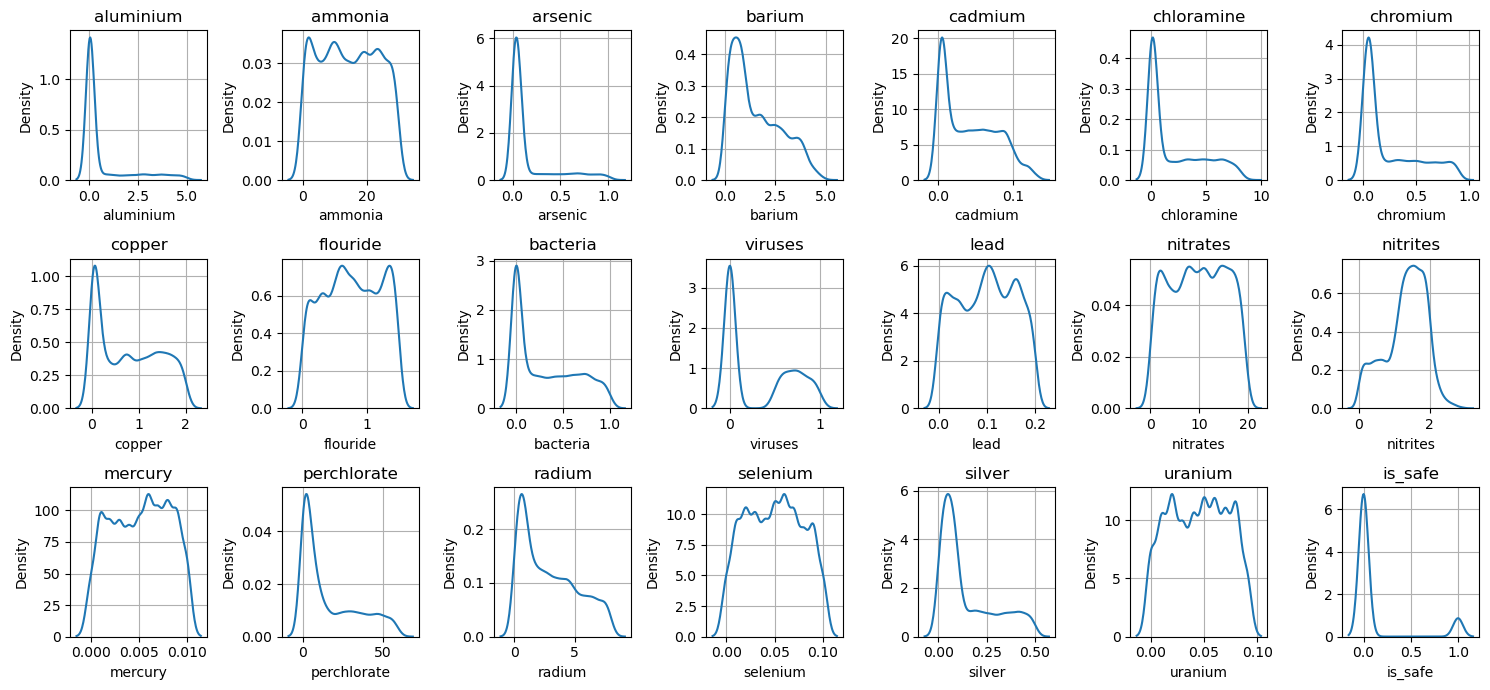

In [22]:
r=3
c=7
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.distplot(df.loc[:,i],hist=False)
    plt.title(i)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

The code is used to create a distribution plot for each column in a given DataFrame. A distribution plot, also known as a density plot, is a graphical representation of the distribution of a dataset. ##It shows the probability density function of the data.

The purpose of creating distribution plots for each column is to get an idea of the distribution of each variable in your dataset. This can help you to understand the underlying patterns and characteristics of your data, such as the central tendency, spread, and skewness of each variable.

In the code, the Seaborn library is used to create the distribution plots. The sns.distplot() function is called for each column in the DataFrame to create the distribution plot. The resulting plot shows the density of the data and can give insights into the shape of the distribution. Additionally, the grid of subplots allows for easy comparison of the distributions between different variables in the dataset.

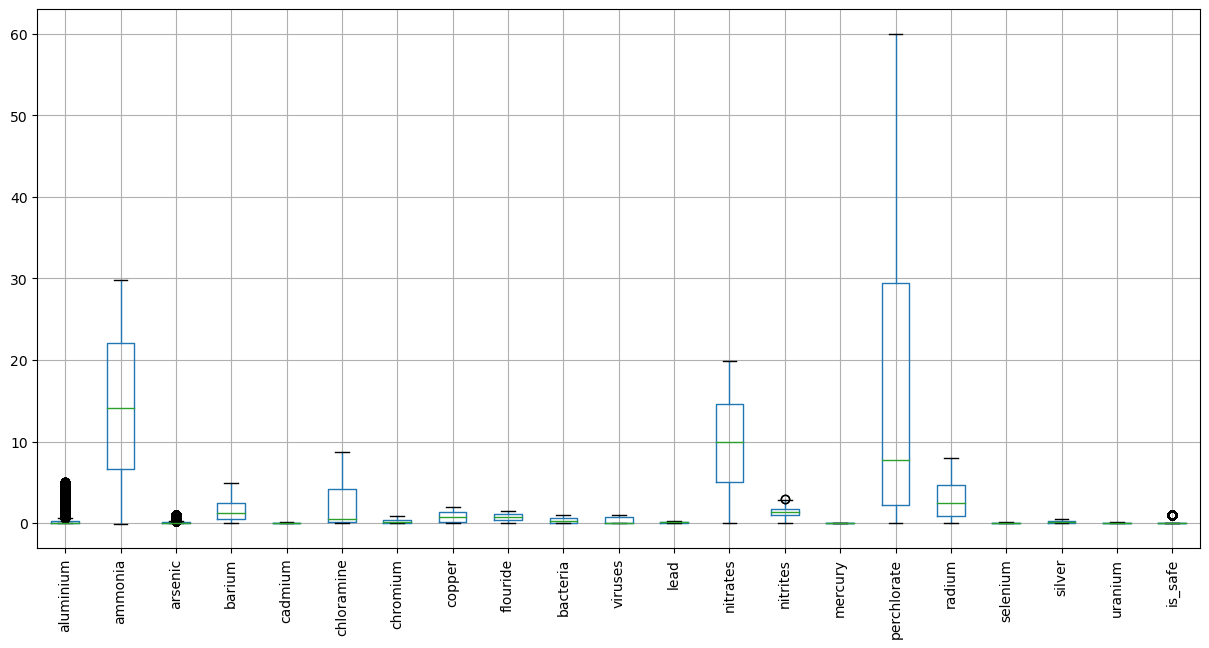

In [22]:
# outliers

df.boxplot()
plt.xticks(rotation=90)
plt.show()

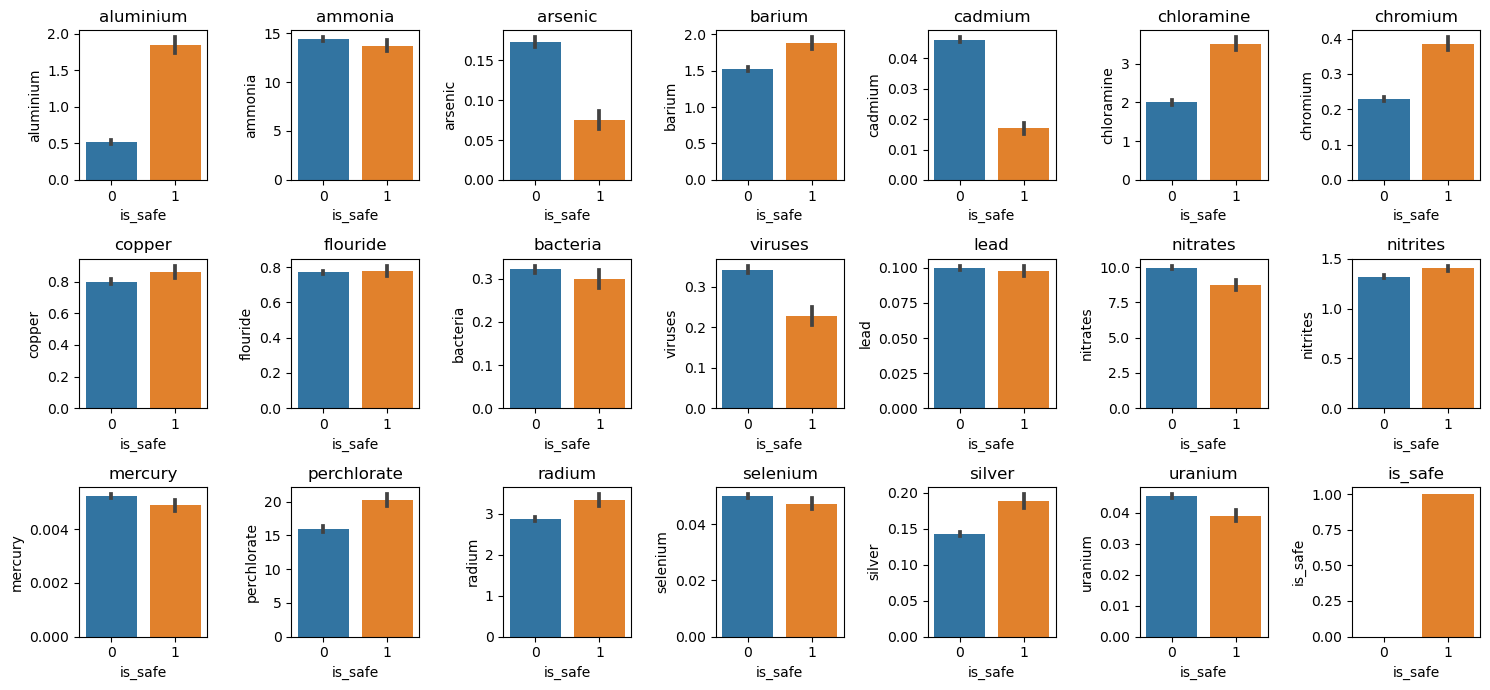

In [23]:
r=3
c=7
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.barplot(y=df.loc[:,i],x='is_safe',data=df)
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

In [24]:
y = df['is_safe']
x = df.drop('is_safe',axis=1)

In [ ]:
# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# split the dataset into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a nonlinear SVM model with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['rbf', 'poly', 'sigmoid']}
clf = GridSearchCV(SVC(), param_grid, cv=5)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# train and test the model

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X = df.drop("is_safe", axis=1)
y = df["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)



cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Confusion matrix:
[[1381   19]
 [ 149   51]]
Accuracy: 0.895
Precision: 0.7285714285714285
Recall: 0.255
F1-score: 0.37777777777777777


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the data from the CSV file


# Split the data into training and testing sets
X = df.drop("is_safe", axis=1)
y = df["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a k-nearest neighbors classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Confusion matrix:
[[1359   41]
 [ 179   21]]
Accuracy: 0.8625
Precision: 0.3387096774193548
Recall: 0.105
F1-score: 0.16030534351145037


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X = df.drop("is_safe", axis=1)
y = df["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)



cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Confusion matrix:
[[1228  172]
 [  77  123]]
Accuracy: 0.844375
Precision: 0.41694915254237286
Recall: 0.615
F1-score: 0.4969696969696969


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X = df.drop("is_safe", axis=1)
y = df["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Confusion matrix:
[[1375   25]
 [  41  159]]
Accuracy: 0.95875
Precision: 0.8641304347826086
Recall: 0.795
F1-score: 0.8281249999999999


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X = df.drop("is_safe", axis=1)
y = df["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion matrix:
[[1396    4]
 [  59  141]]
Accuracy: 0.960625
Precision: 0.9724137931034482
Recall: 0.705
F1-score: 0.817391304347826


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Split the data into training and testing sets
X = df.drop("is_safe", axis=1)
y = df["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train an SVM classifier
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion matrix:
[[1384   16]
 [ 146   54]]
Accuracy: 0.89875
Precision: 0.7714285714285715
Recall: 0.27
F1-score: 0.4


Note that accuracy is a measure of how often the model predicts correctly, precision is a measure of how many of the positive predictions are correct, recall is a measure of how many of the actual positives are predicted correctly, and F1-score is a weighted average of precision and recall that balances the trade-off between them.

# Feature Importances


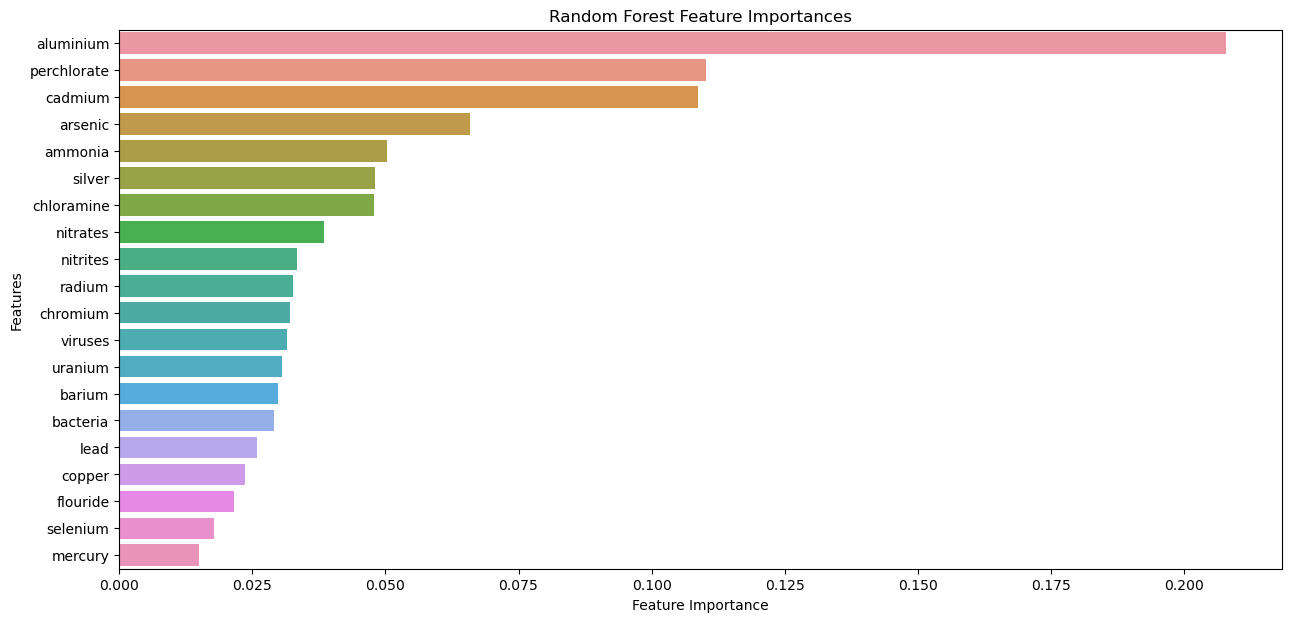

In [79]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split the data into features and labels
X = df.drop('is_safe', axis=1)
y = df['is_safe']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
imp = pd.DataFrame({'Features': X_train.columns, 'Feature_importances': importances})

# Sort features by importance
imp = imp.sort_values(by='Feature_importances', ascending=False)

# Plot feature importances
sns.barplot(y=imp['Features'], x=imp['Feature_importances'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [144]:
# Important Features according to above mentioned Barplot:

imp['Features'][0:7].values

array(['aluminium', 'cadmium', 'perchlorate', 'arsenic', 'ammonia',
       'chloramine', 'silver'], dtype=object)

### 'aluminium', 'cadmium', 'arsenic', 'perchlorate', 'chloramine','chromium', 'silver'## are some of the important features which affect the water quality.